In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
plt.style.use('ggplot')

In [6]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'


In [7]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17080136841649810303,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3665166336
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13916772471478266238
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"]

## 이미지 불러오기

In [8]:
pip install PIL

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


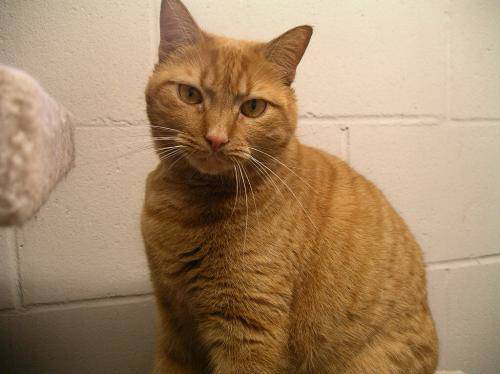

In [9]:
imgData = image.load_img('image/cat/cat1.jpg')
imgData

In [10]:
type(imgData)

PIL.JpegImagePlugin.JpegImageFile

## 정규화

In [11]:
dataGen = image.ImageDataGenerator(rescale=1./255)

## 이미지 디렉터리 가져오기

In [12]:
trainGen= dataGen.flow_from_directory('image',target_size=(98,98))

Found 20 images belonging to 2 classes.


In [13]:
type(trainGen)

keras.preprocessing.image.DirectoryIterator

## x,y훈련 데이터 나눔

In [14]:
x_train,y_train = trainGen.next()

In [15]:
x_train.shape , y_train.shape

((20, 98, 98, 3), (20, 2))

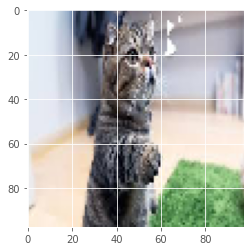

In [16]:
plt.imshow(x_train[0])

## 분류값 확인 0:고양이, 1:개

In [17]:
trainGen.class_indices

{'cat': 0, 'dog': 1}

## 모델링



In [18]:

model = Sequential()
model.add(Flatten(input_shape = (98,98,3)))
model.add(Dense(units=64,  activation='relu' )  )
model.add(Dense(units=32,  activation='relu' )  )
model.add(Dense(units=2,  activation='softmax' )  )

# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.compile( loss='categorical_crossentropy',optimizer='adam', metrics=['acc'])
model.fit(x_train, y_train,epochs=50)
h = model.fit(x_train, y_train,epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 0.8301 - acc: 0.4500
Epoch 2/50
1/1 [==============================] - 0s 3ms/step - loss: 10.4397 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 4ms/step - loss: 5.7578 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 4ms/step - loss: 1.4727 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 4ms/step - loss: 1.5915 - acc: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 3ms/step - loss: 1.4562 - acc: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 0.3424 - acc: 0.9000
Epoch 8/50
1/1 [==============================] - 0s 4ms/step - loss: 1.3587 - acc: 0.7000
Epoch 9/50
1/1 [==============================] - 0s 5ms/step - loss: 0.4392 - acc: 0.8500
Epoch 10/50
1/1 [==============================] - 0s 4ms/step - loss: 0.8128 - acc: 0.8500
Epoch 11/50
1/1 [==============================] - 0s 4ms/step - loss: 1.0486 - acc: 0.80

## 테스트 데이터

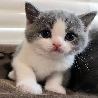

In [19]:
testImg = image.load_img('image/test.jpg',target_size=(98,98))
testImg

In [20]:
type(testImg)

PIL.Image.Image

In [21]:
imgArr = image.img_to_array(testImg) #  넘파이 배열로 만듦
imgArr = imgArr/255   #  스케일링

In [22]:
model.predict(imgArr.reshape(1,98,98,3)).argmax(axis=1)

array([1], dtype=int64)

In [23]:
import pickle
fp = open('catdog.history','wb')
pickle.dump(h.history,fp)
fp.close()

In [24]:
import shelve
sh = shelve.open('myhist')
sh['myh'] = h.history
sh.close()

# CNN CONVOLUTIONAL NEURAL NETWORK

- mnist이용


```
이미지 매트릭스 (90x90)

커널 매트릭스  (3x3)   ->   9칸의 데이터를 계산하여 하나의 값으로 만듦. 


 stride는 몇칸씩 띄워서 계산할지  
 padding 은 zero 할 사이즈 입력.
```
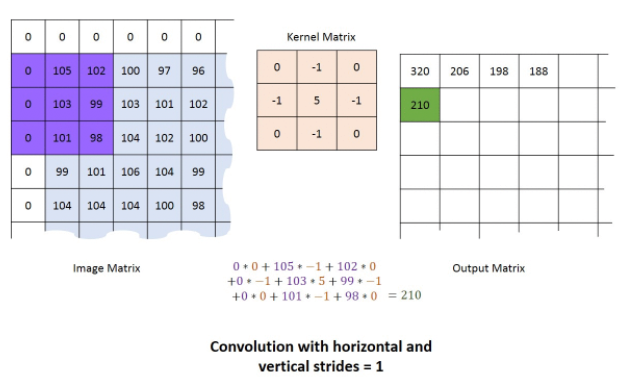



## 데이터 로드

In [25]:
from tensorflow.keras.datasets.mnist import load_data
mnistData = load_data()

##  훈련, 검증 나누기

In [26]:
(x_train,y_train) , (x_test, y_test) = mnistData

In [27]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## y - 원핫 인코딩
- to_categorical(y_train)

In [28]:
y_trainOne = to_categorical(y_train)
y_testOne = to_categorical

## 모델링

In [29]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D

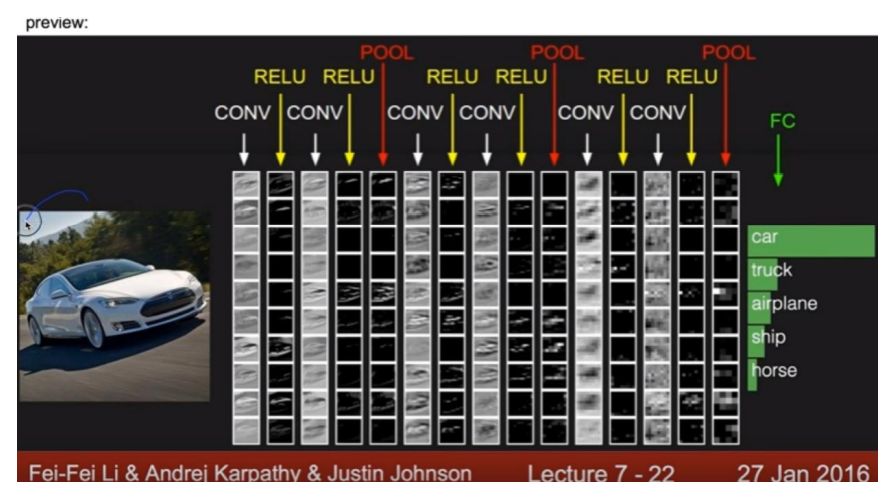

In [38]:
x_train.shape, y_trainOne.shape

((60000, 28, 28), (60000, 10))

In [39]:
x_train[0].shape

(28, 28)

In [40]:
# x_train1 = x_train.reshape(-1, 28, 28, 1)
# x_train1.shape, x_train1[:3]

In [33]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D
model = Sequential()

#  (28-3) / 1 +1 이 32만큼
model.add( Conv2D( 32, kernel_size=(3,3) ,strides=1,input_shape=(28, 28, ), activation='relu' ,padding='same' ) )
model.add( Conv2D( 64, kernel_size=(3,3), activation='relu' ) )
model.add( MaxPool2D( pool_size=(2,2) ))
 
model.add(Flatten())

model.add(Dense(units=64, activation= 'relu'))
model.add(Dense(units=10, activation= 'softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])
model.fit(x_train1, y_trainOne,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 3ms/step - loss: 0.3544 - acc: 0.9498
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0611 - acc: 0.9821
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425 - acc: 0.9869
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0335 - acc: 0.9893
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0312 - acc: 0.9907
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0239 - acc: 0.9927
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0203 - acc: 0.9936
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0175 - acc: 0.9945
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0143 - acc: 0.9952
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0170 - acc: 0.9949


## 모델 평가

In [35]:
model.evaluate(x_train1,y_trainOne)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0076 - acc: 0.9976


[0.007561513688415289, 0.9975666403770447]

In [37]:
plt.figure(figsize=(20,20))
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, model.predict( x_test.reshape(10000,28,28)).argmax(axis=1)),
            annot=True,
            annot_kws={'size': 20},
            cmap='Reds',
            fmt = 'd',                             # 지수로 안나오고 정수로 나오게
            linewidths=0.5
            
           );

ModuleNotFoundError: No module named 'sklearn'

<Figure size 1440x1440 with 0 Axes>

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
tf.test.is_gpu_available()